# BirdNET Spectrogram Classifier Confusion Matrices

#### In this notebook, we load the preprocessed BirdNET spectrogram dataset and explore using Logistic Regression, SVM, and KNN.

This notebook makes heavy use of the module classifiers.py, which contains a custom class for applying various classification algorithms to a given dataset, as well as organizing statistical outputs. 

In [10]:
## Import necessary modules
import numpy as np
import os
import librosa
import keras
import pandas as pd
import time
import math
from IPython.display import clear_output

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
## Import the classifiers.py module
import classifiers

In [3]:
spectrograms = pd.read_csv('/home/birdsong/processed_data/spectrograms/spectrograms.csv').values[:,1:]
labels = pd.read_csv('/home/birdsong/processed_data/spectrograms/labels_fp_are_tp.csv').values[:,1]
#labels = np.concatenate((labels_tp, np.full(7781, -1, dtype = int)))
probabilities = pd.read_csv('/home/birdsong/processed_data/spectrograms/probabilities.csv').values

In [4]:
print(spectrograms.shape)
print(labels.shape)
print(probabilities.shape)

(8997, 2816)
(8997,)
(8997, 25)


In [5]:
## Only consider the true-positive data
spectrograms_tp = spectrograms[:1216]
print(spectrograms_tp.shape)

(1216, 2816)


In [16]:
# load frog and bird unique types
frog_bird_labels = np.loadtxt('/home/birdsong/processed_data/frog_bird_labels.csv')
frog_bird_labels.shape

(26,)

In [7]:
cls = classifiers.Classifier(input_X = spectrograms_tp,
                             input_y = labels[:1216],
                             ordered_labels = frog_bird_labels)

cls.t_t_split()

In [8]:
cls.log_reg(CV = False)
print("---------------------")

cls.log_reg(CV = True)
print("---------------------")

cls.svm(CV = False)
print("---------------------")
cls.svm(CV = True)
print("---------------------")

cls.knn(CV = False,
        max_n_neighbors = 1)
print("---------------------")

cls.knn(CV = True,
        max_n_neighbors = 30)
print("---------------------")

The Logistic Regression test accuracy was 0.6065573770491803
The Logistic Regression train accuracy was 1.0
You can load and save the confusion matrix from the pickled dictionary under the key 'log_reg_mat'
---------------------
CV Split: 0
CV Split: 1
CV Split: 2
CV Split: 3
CV Split: 4
Elapsed Time: 5.624545574188232
The highest CV Logistic Regression test accuracy was 0.6376811594202898
The highest CV Logistic Regression train accuracy was 1.0
---------------------
The SVM test accuracy was 0.4972677595628415
The SVM train accuracy was 0.8238141335914811
You can load and save the confusion matrix from the pickled dictionary under the key 'svm_mat'
---------------------
CV Split: 0
CV Split: 1
CV Split: 2
CV Split: 3
CV Split: 4
Elapsed Time: 11.238420486450195
The highest CV SVM test accuracy was 0.5048543689320388
The highest CV SVM train accuracy was 0.8305084745762712
---------------------
The KNN test accuracy was 0.4644808743169399
The KNN train accuracy was 1.0
You can load an

### Let's try to regularize a little bit with our Log Reg:

In [11]:
train_accuracies = []
test_accuracies = []

for alpha in np.linspace(0.0,10.0,50):
    clear_output(wait = True)
    print('C = %.6f' % math.exp(-alpha))

    reg = LogisticRegression(max_iter=1000, penalty = 'l2', C=math.exp(-alpha)).fit(cls.X_train_scaled, cls.y_train)
    y_train_pred = reg.predict(cls.X_train_scaled)
    y_test_pred = reg.predict(cls.X_test_scaled)
    train_accuracies.append(np.count_nonzero(cls.y_train == y_train_pred) / len(cls.y_train))
    test_accuracies.append(np.count_nonzero(cls.y_test == y_test_pred) / len(cls.y_test))

C_values = np.exp(-np.linspace(0.0,10.0,50))

C = 0.000045


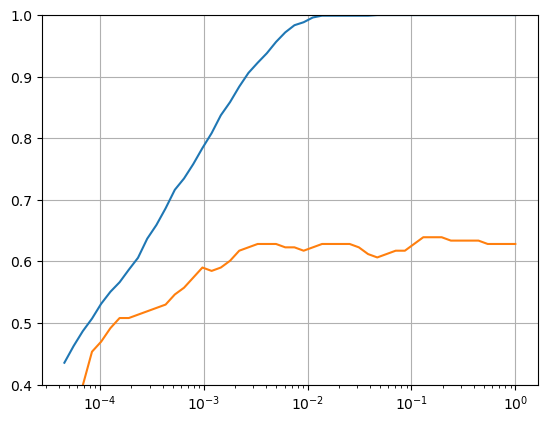

In [18]:
plt.xscale('log')
plt.plot(C_values,train_accuracies)
plt.plot(C_values,test_accuracies)
plt.ylim((0.4,1.0))
plt.grid()
plt.show()

#### Re-run Log Reg with C = 0.01:

In [20]:
cls.log_reg(CV = False,
            penalty='l2',
            C_val=0.005)
print("---------------------")

cls.log_reg(CV = True,
            penalty='l2',
            C_val=0.005)
print("---------------------")

The Logistic Regression test accuracy was 0.6284153005464481
The Logistic Regression train accuracy was 0.957405614714424
You can load and save the confusion matrix from the pickled dictionary under the key 'log_reg_mat'
---------------------
CV Split: 0
CV Split: 1
CV Split: 2
CV Split: 3
CV Split: 4
Elapsed Time: 38.98455333709717
The highest CV Logistic Regression test accuracy was 0.6618357487922706
The highest CV Logistic Regression train accuracy was 0.969770253929867
---------------------


In [14]:
cls.save_statistics('/home/birdsong/classifier_stats/cls_stats_mat')
classifiers.save_object_to_pickle(cls, '/home/birdsong/classifier_stats/cls_mat')

In [15]:
np.savetxt('/home/birdsong/classifier_stats/cls_log_reg_CM_mat.csv', cls.log_reg_mat, delimiter = ',')
np.savetxt('/home/birdsong/classifier_stats/cls_svm_CM_mat.csv', cls.svm_mat, delimiter = ',')
np.savetxt('/home/birdsong/classifier_stats/cls_knn_CM_mat.csv', cls.knn_mat, delimiter = ',')